In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df = df.drop('Unnamed: 0', axis = 1)

In [4]:
#df = df.set_index('timestamp')
#df.head()

<AxesSubplot: >

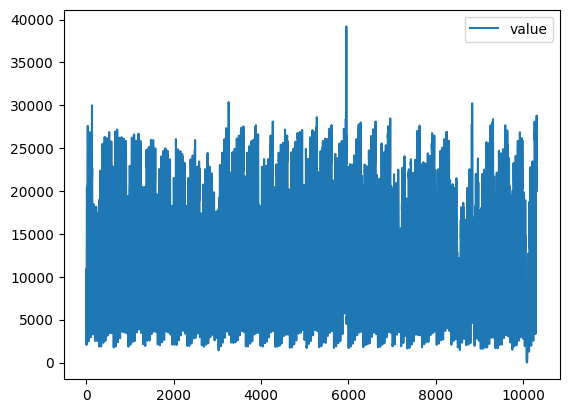

In [5]:
df.plot()

In [6]:
#Here it seems to be a bit more confusing, so lets preprocess the data 

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month
df['day'] = df.timestamp.dt.day
df['day_of_week'] = df.timestamp.dt.day_of_week + 1
df['hour'] = df.timestamp.dt.hour
#df['hour'] += df.timestamp.dt.minute / 60
df.head()

,timestamp,value,year,month,day,day_of_week,hour
0,2014-07-01 00:00:00,10844,2014,7,1,2,0
1,2014-07-01 00:30:00,8127,2014,7,1,2,0
2,2014-07-01 01:00:00,6210,2014,7,1,2,1
3,2014-07-01 01:30:00,4656,2014,7,1,2,1
4,2014-07-01 02:00:00,3820,2014,7,1,2,2


In [8]:
df['is_weekend'] = df.day_of_week.map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1})
df.head()

,timestamp,value,year,month,day,day_of_week,hour,is_weekend
0,2014-07-01 00:00:00,10844,2014,7,1,2,0,0
1,2014-07-01 00:30:00,8127,2014,7,1,2,0,0
2,2014-07-01 01:00:00,6210,2014,7,1,2,1,0
3,2014-07-01 01:30:00,4656,2014,7,1,2,1,0
4,2014-07-01 02:00:00,3820,2014,7,1,2,2,0


/var/folders/5r/838df99x261_0xzfv2s1wz4r0000gn/T/ipykernel_14016/3783171946.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=daily, x='hour', y='value', ci=None, palette='Wistia')


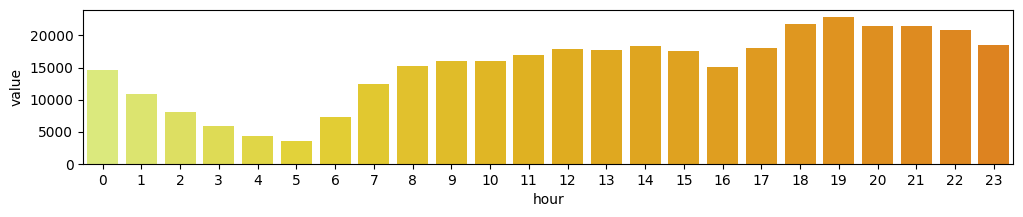

In [33]:
plt.figure(figsize=(12,2))

daily = df.groupby(['hour', 'day_of_week'])['value'].mean().reset_index()

sns.barplot(data=daily, x='hour', y='value', ci=None, palette='Wistia')
plt.show()

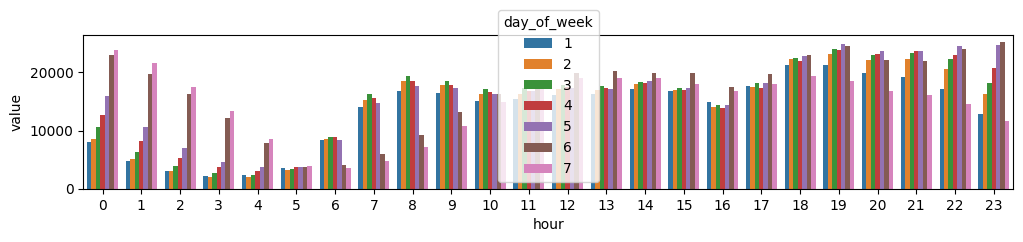

In [32]:
plt.figure(figsize=(12,2))
sns.barplot(data=daily, x='hour', y='value', hue='day_of_week')
plt.show()

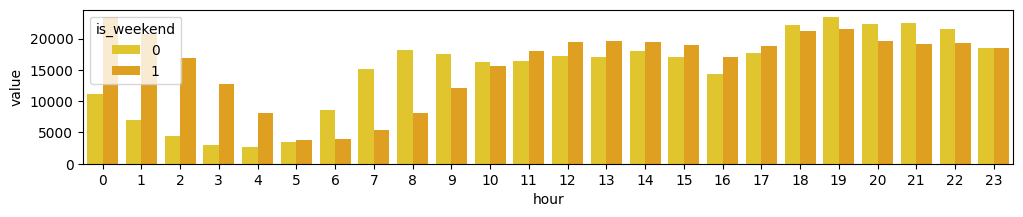

In [31]:
weekend = df.groupby(['hour', 'is_weekend'])['value'].mean().reset_index()

plt.figure(figsize=[12,2])
sns.barplot(data=weekend, x='hour', y='value', hue='is_weekend', palette='Wistia')
plt.show()

In [12]:
df.year.value_counts()

2014    8832
2015    1488
Name: year, dtype: int64

In [13]:
hour_min = df.groupby('hour')['value'].min().reset_index()
hour_max = df.groupby('hour')['value'].max().reset_index()
hour_std = df.groupby('hour')['value'].std().reset_index()
hour_mean = df.groupby('hour')['value'].mean().reset_index()

In [14]:
hour_std.columns = ['hour', 'std']

In [15]:
hour_mean.columns = ['hour', 'mean']
hour_stat = hour_mean.copy()
hour_stat['std'] = hour_std['std']
hour_stat

,hour,mean,std
0,0,14642.144186,6743.171463
1,1,10858.465116,7106.616858
2,2,8010.365116,6231.954314
3,3,5802.430233,4868.045296
4,4,4264.090698,2984.294096
5,5,3583.472093,1001.400899
6,6,7294.988372,3238.220043
7,7,12390.241860,5577.346008
8,8,15337.730233,5687.683915
9,9,16021.172093,3859.084478


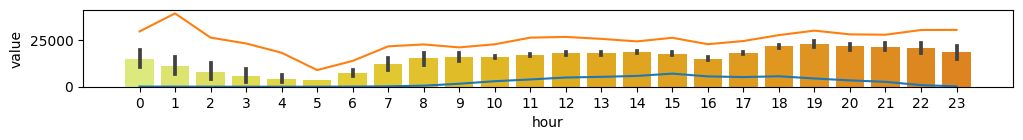

In [29]:
plt.figure(figsize=(12,1))

sns.barplot(data=daily, x='hour', y='value', palette='Wistia')
sns.lineplot(data=hour_min, x='hour', y='value')
sns.lineplot(data=hour_max, x='hour', y='value')

plt.show()

In [17]:
df[df.value > 30000]

,timestamp,value,year,month,day,day_of_week,hour,is_weekend
3261,2014-09-06 22:30:00,30313,2014,9,6,6,22,1
3262,2014-09-06 23:00:00,30373,2014,9,6,6,23,1
5954,2014-11-02 01:00:00,39197,2014,11,2,7,1,1
5955,2014-11-02 01:30:00,35212,2014,11,2,7,1,1
8834,2015-01-01 01:00:00,30236,2015,1,1,4,1,0


In [18]:
df[df.value < 1000]

,timestamp,value,year,month,day,day_of_week,hour,is_weekend
10077,2015-01-26 22:30:00,866,2015,1,26,1,22,0
10078,2015-01-26 23:00:00,297,2015,1,26,1,23,0
10079,2015-01-26 23:30:00,189,2015,1,26,1,23,0
10080,2015-01-27 00:00:00,109,2015,1,27,2,0,0
10081,2015-01-27 00:30:00,80,2015,1,27,2,0,0
10082,2015-01-27 01:00:00,40,2015,1,27,2,1,0
10083,2015-01-27 01:30:00,39,2015,1,27,2,1,0
10084,2015-01-27 02:00:00,26,2015,1,27,2,2,0
10085,2015-01-27 02:30:00,32,2015,1,27,2,2,0
10086,2015-01-27 03:00:00,8,2015,1,27,2,3,0


In [19]:
xmas = df.iloc[8420:8600]

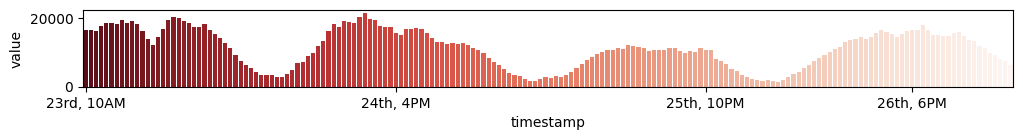

In [28]:
plt.figure(figsize=(12,1))

sns.barplot(data=xmas, x='timestamp', y='value', palette='Reds_r')
plt.xticks(ticks=[0,60,120,160], labels=['23rd, 10AM', '24th, 4PM', '25th, 10PM', '26th, 6PM'])
plt.show()

In [21]:
df[df.timestamp == '2014-11-27']

,timestamp,value,year,month,day,day_of_week,hour,is_weekend
7152,2014-11-27,13522,2014,11,27,4,0,0


In [22]:
thanksgiving = df.iloc[7124:7226]

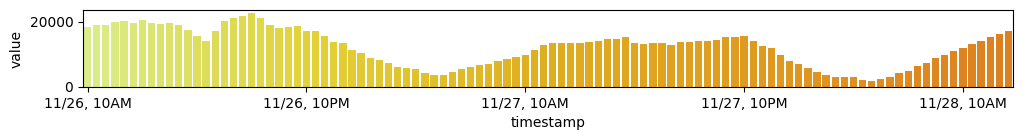

In [27]:
plt.figure(figsize=(12,1))
sns.barplot(data=thanksgiving, x='timestamp', y='value', palette='Wistia')
plt.xticks(ticks=[0,24,48,72,96], labels=['11/26, 10AM','11/26, 10PM', '11/27, 10AM','11/27, 10PM', '11/28, 10AM'])
plt.show()